0.102266190261
0.017682261481
0.0142769916853
0.0133846897165
0.0130264735432
0.0128494952389
0.0127482705629
0.0126815441058
0.0126300344164
0.0125837540146
0.0125376928581
0.0124901176444
0.0124414768196
0.0123933193474
0.0123473430957
0.0123048182754
0.0122664205628
0.0122323227578
0.0122023710518
0.0121762417793
0.0121535458934
0.0121338868504
0.0121168882435
0.0121022050999
0.012089527387
0.0120785800611
0.0120691215739
0.0120609416258
0.0120538585114
0.0120477162564
0.0120423816966
0.0120377416225
0.0120337000839
0.0120301759176
0.012027100532
0.0120244159601
0.0120220731728
0.0120200306351
0.0120182530823
0.0120167104874


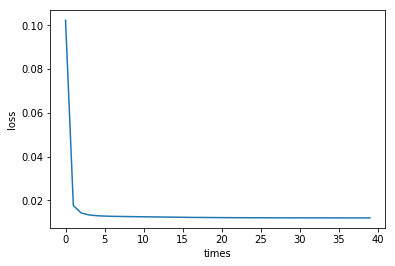

[[ 3.87376488  2.99206551  2.97505063 ...,  1.86116036  2.7727124
   2.83429707]
 [ 4.02557178  3.24891211  3.13326656 ...,  1.97755086  2.9414911
   2.89469006]
 [ 3.44871891  2.70931571  2.66219974 ...,  1.67112619  2.48809735
   2.5067682 ]
 ..., 
 [ 4.30896626  3.50631461  3.36239791 ...,  2.12569674  3.16092154
   3.08805849]
 [ 4.4953446   3.97423025  3.60214522 ...,  2.3160897   3.43384931
   3.10681221]
 [ 3.86899891  3.15544772  3.02121092 ...,  1.91087672  2.84125292
   2.77015781]]


In [4]:
import numpy as np
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import time
import matplotlib.pyplot as plt

def r_file( file_name):
    file = open( file_name)
    data = file.read()
    file.close()
    data = np.array( data.split( ))
    data = data.reshape( [int(len(data)/4) , 4] )
    return data

def calculate( matrix , data):
    i=0
    j=0
    for x in range(data.shape[0]):
        i=int(data[x][0])-1
        j=int(data[x][1])-1
        matrix[i][j] = data[x][2]
    return matrix

def makeMatrix():
    r_b = np.zeros(943*1682).reshape(943,1682)
    r_t = np.zeros(943*1682).reshape(943,1682)
    #这里只用了u1
    data1 = r_file('ml-100k/u1.base')
    data2 = r_file('ml-100k/u1.test')
    calculate(r_b,data1)
    calculate(r_t,data2)
    return r_b, r_t

def matrix_factorization(R_b, R_t, P, Q, K, steps=400, alpha=0.0005, beta=0.02):
    Q = Q.T
    L_list = []
    for step in range(steps):
        for i in range(len(R_b)):
            for j in range(len(R_b[i])):
                if R_b[i][j] > 0:
                    e = R_b[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + (2 * e * Q[k][j] - beta * P[i][k])*alpha 
                        Q[k][j] = Q[k][j] + (2 * e* P[i][k] - beta * Q[k][j])*alpha 
        if step%10 == 0:
            l = 0
            for i in range(len(R_t)):
                for j in range(len(R_t[i])): 
                    if R_t[i][j] > 0:
                        l = l + pow(R_t[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                        for k in range(K):
                            l = l + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))#正则化
            l = l/(R_b.shape[0]*R_b.shape[1])
            L_list.append(l)
            print(l)
            if l < 0.001:
                break
    return P, Q.T, L_list

r_b , r_t = makeMatrix()
N = len(r_b)
M = len(r_b[0])
K = 2
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
P1, Q1, L_v = matrix_factorization(r_b, r_t, P, Q, K)

plt.xlabel('times')
plt.ylabel('loss')
time_list=[i for i in range(40)]
line1=plt.plot(time_list,np.array(L_v))
plt.show()
error = 0
R1 = np.dot(P1, Q1.T)
print(R1)

